In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# playerID       Player ID code
# yearID         Year
# stint          player's stint (order of appearances within a season)
# teamID         Team
# lgID           League
# G              Games
# AB             At Bats
# R              Runs
# H              Hits
# 2B             Doubles
# 3B             Triples
# HR             Homeruns
# RBI            Runs Batted In
# SB             Stolen Bases
# CS             Caught Stealing
# BB             Base on Balls
# SO             Strikeouts
# IBB            Intentional walks
# HBP            Hit by pitch
# SH             Sacrifice hits
# SF             Sacrifice flies
# GIDP           Grounded into double plays

In [3]:
batting = pd.read_csv("Batting.csv")
pd.set_option('display.max_columns', 100)

batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [4]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [5]:
juiced = batting[batting['yearID'] > 2013]
juiced.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
105856,zimmebr01,2018,1,CLE,AL,34,106,14,24,5,0,2,9.0,4.0,1.0,7,44.0,0.0,1.0,0.0,0.0,1.0
105857,zimmejo02,2018,1,DET,AL,25,2,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
105858,zimmery01,2018,1,WAS,NL,85,288,33,76,21,2,13,51.0,1.0,1.0,30,55.0,1.0,3.0,0.0,2.0,10.0
105859,zobribe01,2018,1,CHN,NL,139,455,67,139,28,3,9,58.0,3.0,4.0,55,60.0,1.0,2.0,1.0,7.0,8.0
105860,zuninmi01,2018,1,SEA,AL,113,373,37,75,18,0,20,44.0,0.0,0.0,24,150.0,0.0,6.0,0.0,2.0,7.0


In [6]:
ster = batting[batting['yearID'] > 1989]
steroids = ster[ster['yearID'] < 2004]

In [7]:
np.mean(steroids.HR), np.mean(juiced.HR)

(3.643043705380463, 3.551056101170456)

In [8]:
np.median(steroids.HR), np.median(juiced.HR)

(0.0, 0.0)

In [9]:
print("Steroid Era Max Home Runs: {} \nJuiced Ball Era Max Home Runs: {}".format(max(steroids.HR),  
                                                                                 max(juiced.HR)))

Steroid Era Max Home Runs: 73 
Juiced Ball Era Max Home Runs: 59


In [10]:
steroids.loc[steroids['HR'].idxmax()] #Barry Bonds 

playerID    bondsba01
yearID           2001
stint               1
teamID            SFN
lgID               NL
G                 153
AB                476
R                 129
H                 156
2B                 32
3B                  2
HR                 73
RBI               137
SB                 13
CS                  3
BB                177
SO                 93
IBB                35
HBP                 9
SH                  0
SF                  2
GIDP                5
Name: 80768, dtype: object

In [11]:
 juiced.loc[juiced['HR'].idxmax()] #Mike (Giancarlo) Stanton

playerID    stantmi03
yearID           2017
stint               1
teamID            MIA
lgID               NL
G                 159
AB                597
R                 123
H                 168
2B                 32
3B                  0
HR                 59
RBI               132
SB                  2
CS                  2
BB                 85
SO                163
IBB                13
HBP                 7
SH                  0
SF                  3
GIDP               13
Name: 104124, dtype: object

In [12]:
juiced.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000,7433.000000
mean,2016.027983,1.096596,47.475044,111.349657,14.309700,28.146374,5.555630,0.578905,3.551056,13.628952,1.722992,0.671600,10.049240,26.258577,0.641329,1.155657,0.715189,0.824163,2.465761
std,1.413746,0.316535,44.842449,175.310827,24.842337,47.421158,9.729946,1.437708,7.331025,24.335885,4.995270,1.688918,18.387045,40.104433,1.938151,2.573905,1.652544,1.697097,4.517660
min,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,1.000000,31.000000,11.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,1.000000,69.000000,157.000000,17.000000,37.000000,7.000000,0.000000,3.000000,16.000000,1.000000,0.000000,12.000000,38.000000,0.000000,1.000000,1.000000,1.000000,3.000000
max,2018.000000,5.000000,162.000000,684.000000,137.000000,225.000000,56.000000,15.000000,59.000000,133.000000,64.000000,23.000000,143.000000,219.000000,29.000000,30.000000,14.000000,15.000000,31.000000


In [13]:
#check skewness
#check median 
#at least 100 at bats

In [14]:
juiced.isnull().sum()

playerID    0
yearID      0
stint       0
teamID      0
lgID        0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
SB          0
CS          0
BB          0
SO          0
IBB         0
HBP         0
SH          0
SF          0
GIDP        0
dtype: int64

In [15]:
steroids.isnull().sum()

playerID    0
yearID      0
stint       0
teamID      0
lgID        0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
SB          0
CS          0
BB          0
SO          0
IBB         0
HBP         0
SH          0
SF          0
GIDP        0
dtype: int64

In [16]:
juiced.AB.describe()

count    7433.000000
mean      111.349657
std       175.310827
min         0.000000
25%         0.000000
50%        11.000000
75%       157.000000
max       684.000000
Name: AB, dtype: float64

In [17]:
steroids.AB.describe()

count    17229.000000
mean       124.487666
std        180.041678
min          0.000000
25%          0.000000
50%         24.000000
75%        192.000000
max        696.000000
Name: AB, dtype: float64

In [18]:
#All players with at least 100 at bats 
juicedAB = juiced[juiced['AB'] > 99]
steroidsAB = steroids[steroids['AB'] > 99]

In [19]:
len(steroidsAB), len(juicedAB)

(5789, 2207)

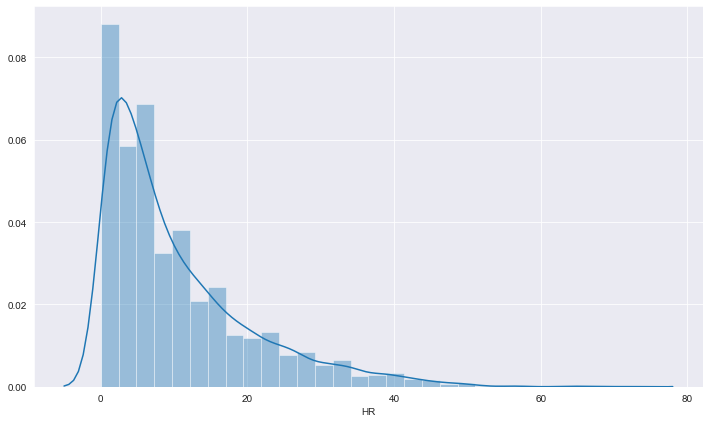

In [20]:
plt.figure(figsize=(12,7))
sns.distplot(steroidsAB['HR'], bins=30,);

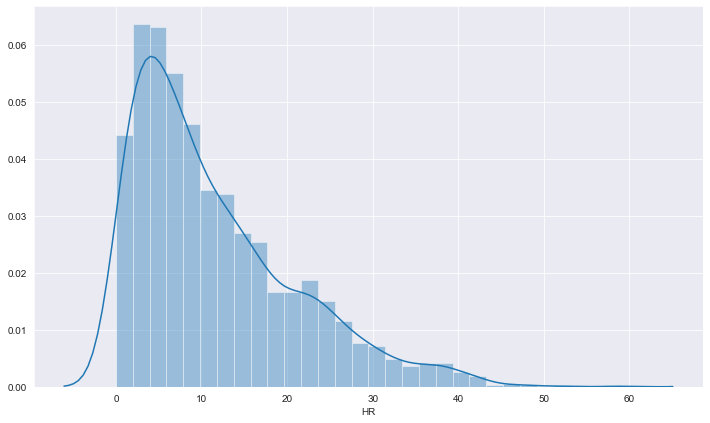

In [21]:
plt.figure(figsize=(12,7))
sns.distplot(juicedAB['HR'], bins=30);

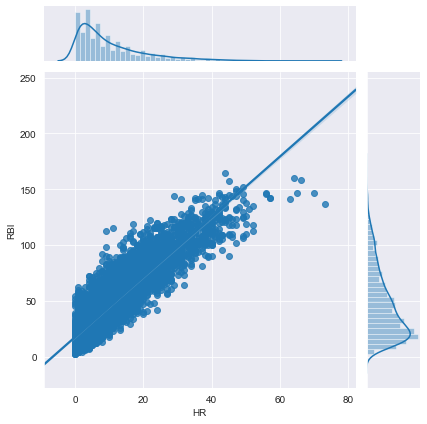

In [22]:
sns.jointplot(x='HR', y='RBI', data=steroidsAB, kind='reg');

In [ ]:
juicedAB.to_csv("juiced.csv")
steroidsAB.to_csv("ster")